In [ ]:
import pandas as pd

# Import and Load Dataset

In [ ]:
code_redi_df = pd.read_csv("/content/drive/MyDrive/Dataset_CS240/Code_Red_I.csv")
slammer_df = pd.read_csv("/content/drive/MyDrive/Dataset_CS240/Slammer.csv")
nimda_df = pd.read_csv("/content/drive/MyDrive/Dataset_CS240/Nimda.csv")

In [ ]:
nimda_df.shape
#code_redi_df.shape
slammer_df.shape

(7200, 42)

# Combine the dataset

In [ ]:
dataset1 = pd.concat([slammer_df,nimda_df],  ignore_index=True)
#dataset1 = slammer_df.append(nimda_df)

In [ ]:
dataset1.shape

(15809, 42)

In [ ]:
dataset1.head(10)

,Hour and Minutes,Hour,Minutes,Seconds,Number of announcements,Number of withdrawals,Number of announced NLRI prefixes,Number of withdrawn NLRI prefixes,Average AS-path length,Maximum AS-path length,Average Unique AS Path length,Number of Duplicate Announcements,Number of Duplicate Withdrawals,Number of Implicit Withdrawals,Average Edit Distance,Maximum Edit Distance,Inter-arrival Time,Maximum edit distance7,Maximum edit distance8,Maximum edit distance9,Maximum edit distance10,Maximum edit distance11,Maximum edit distance12,Maximum edit distance13,Maximum edit distance14,Maximum edit distance15,Maximum edit distance16,Maximum edit distance17,Maximum AS-path length7,Maximum AS-path length8,Maximum AS-path length9,Maximum AS-path length10,Maximum AS-path length11,Maximum AS-path length12,Maximum AS-path length13,Maximum AS-path length14,Maximum AS-path length15,Number of Interior Gateway Protocol (IGP) packets,Number of Exterior Gateway Protocol (EGP) packets,Number of incomplete packets,Packet size (B),Label
0,0,0,0,8,46,4,88,13,6,12,6,1,54,4,12,0.8,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,41,0,5,243,-1
1,1,0,1,4,40,4,161,28,6,8,6,27,96,0,8,0.7,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,34,0,6,287,-1
2,2,0,2,0,59,7,133,69,6,13,6,2,103,11,13,1.1,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,55,0,4,256,-1
3,3,0,3,12,52,4,138,32,5,7,6,12,105,0,7,0.9,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48,0,4,263,-1
4,4,0,4,9,49,2,119,24,6,9,6,1,63,0,9,0.8,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,46,0,3,252,-1
5,5,0,5,4,80,3,231,26,7,11,7,8,228,0,11,1.3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,76,0,4,270,-1
6,6,0,6,0,43,7,126,60,6,11,6,3,67,12,11,0.8,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,42,0,1,258,-1
7,7,0,7,15,23,1,38,3,7,10,7,2,33,0,10,0.4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,0,1,222,-1
8,8,0,8,8,39,3,54,3,6,12,6,2,34,1,12,0.7,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,35,0,4,214,-1
9,9,0,9,7,40,4,134,8,7,12,7,5,64,1,12,0.7,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,35,0,5,265,-1


In [ ]:
X_train1 = dataset1.drop(dataset1.columns[[0,1,2,3,41]], axis=1)
Y_train1 = dataset1.iloc[:,41]
Y_train1 = [0 if ele>0 else 1 for ele in Y_train1]
Y_train = pd.Series(Y_train1)
X_test1 = code_redi_df.drop(code_redi_df.columns[[0,1,2,3,41]], axis=1)
Y_test1 = code_redi_df.iloc[:,41]
Y_test1 = [0 if ele>0 else 1 for ele in Y_test1]
Y_test = pd.Series(Y_test1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train1)
X_train = pd.DataFrame(data=X_train_norm, columns = X_train1.columns)
X_test_norm = sc.fit_transform(X_test1)
X_test = pd.DataFrame(data=X_test_norm, columns = X_test1.columns)


In [ ]:
X_train.shape

(15809, 37)

# SVM implementation

In [ ]:
from sklearn import svm
from sklearn import metrics

In [ ]:
linear_svm_clf = svm.SVC(kernel="linear", probability=True)
linear_svm_clf.fit(X_train, Y_train)

KeyboardInterrupt: ignored

## Linear Kernel

In [ ]:
Y_pred = linear_svm_clf.predict(X_test)
print("accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('F1 is: ', metrics.f1_score(Y_test, Y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

accuracy: 0.9145833333333333
F1 is:  0.9548557586434706
True negatives:  81 
False positives:  519 
False negatives:  96 
True Positives:  6504


## Linear with feature selection

In [ ]:
X_train_sf = X_train.loc[:,['Number of Duplicate Withdrawals', 'Maximum AS-path length', 'Number of withdrawals', 'Number of Implicit Withdrawals', 'Number of incomplete packets']]
X_test_sf = X_test.loc[:,['Number of Duplicate Withdrawals', 'Maximum AS-path length', 'Number of withdrawals', 'Number of Implicit Withdrawals', 'Number of incomplete packets']]
X_train_sf.shape
X_test_sf.shape
X_test_sf.head(10)
Y_test.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int64

In [ ]:
linear_svm_clf = svm.SVC(kernel="linear", probability=True)
linear_svm_clf.fit(X_train_sf, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
Y_pred = linear_svm_clf.predict(X_test_sf)
from sklearn import metrics
print("accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('F1 is: ', metrics.f1_score(Y_test, Y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

accuracy: 0.9122222222222223
F1 is:  0.9536180830764713
True negatives:  71 
False positives:  529 
False negatives:  103 
True Positives:  6497


# SVM rbf without feature selection

In [ ]:
rbf_svm_clf = svm.SVC(kernel="rbf")
rbf_svm_clf.fit(X_train, Y_train)

SVC()

In [ ]:
Y_pred = rbf_svm_clf.predict(X_test)
print("accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('F1 is: ', metrics.f1_score(Y_test, Y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

accuracy: 0.9365277777777777
F1 is:  0.9657959733552878
True negatives:  291 
False positives:  309 
False negatives:  148 
True Positives:  6452


# Cubic Kernel without feature selection

In [ ]:
cubic_svm_clf = svm.SVC(kernel="poly", degree=3, probability=True)
cubic_svm_clf.fit(X_train, Y_train)

SVC(kernel='poly', probability=True)

In [ ]:
Y_pred = cubic_svm_clf.predict(X_test)
print("accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('F1 is: ', metrics.f1_score(Y_test, Y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

accuracy: 0.9204166666666667
F1 is:  0.9575524112897251
True negatives:  164 
False positives:  436 
False negatives:  137 
True Positives:  6463


# Quadratic kernel without feature selection

In [ ]:
quad_svm_clf = svm.SVC(kernel="poly", degree=2, probability=True)
quad_svm_clf.fit(X_train, Y_train)

SVC(degree=2, kernel='poly', probability=True)

In [ ]:
Y_pred = quad_svm_clf.predict(X_test)
print("accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print('F1 is: ', metrics.f1_score(Y_test, Y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, Y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

accuracy: 0.9234722222222222
F1 is:  0.9594644302214375
True negatives:  128 
False positives:  472 
False negatives:  79 
True Positives:  6521


# ROC curve

In [ ]:
quad_svm_clf = svm.SVC(kernel="poly", degree=2, probability=True)
y_score_quad = quad_svm_clf.fit(X_train, Y_train).decision_function(X_test)

In [ ]:
linear_svm_clf = svm.SVC(kernel="linear", probability=True)
y_score_linear = linear_svm_clf.fit(X_train, Y_train).decision_function(X_test)

In [ ]:
rbf_svm_clf = svm.SVC(kernel="rbf")
y_score_rbf = rbf_svm_clf.fit(X_train, Y_train).decision_function(X_test)

In [ ]:
cubic_svm_clf = svm.SVC(kernel="poly", degree=3, probability=True)
y_score_cubic = cubic_svm_clf.fit(X_train, Y_train).decision_function(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
svm_auc_quad = roc_auc_score(Y_test, y_score_quad)

In [ ]:
svm_auc_linear = roc_auc_score(Y_test, y_score_linear)

In [ ]:
svm_auc_rbf = roc_auc_score(Y_test, y_score_rbf)

In [ ]:
svm_auc_cubic = roc_auc_score(Y_test, y_score_cubic)

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_score_quad)
linear_fpr, linear_tpr, _ = roc_curve(Y_test, y_score_linear)
rbf_fpr, rbf_tpr, _ = roc_curve(Y_test, y_score_rbf)
cubic_fpr, cubic_tpr, _ = roc_curve(Y_test, y_score_cubic)

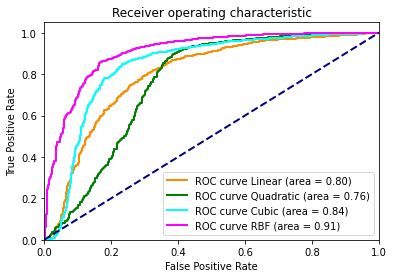

In [ ]:
plt.figure()
lw = 2

plt.plot(linear_fpr, linear_tpr, color='darkorange',
         lw=lw, label='ROC curve Linear (area = %0.2f)' % svm_auc_linear)
plt.plot(fpr, tpr, color='green',
         lw=lw, label='ROC curve Quadratic (area = %0.2f)' % svm_auc_quad)
plt.plot(cubic_fpr, cubic_tpr, color='cyan',
         lw=lw, label='ROC curve Cubic (area = %0.2f)' % svm_auc_cubic)
plt.plot(rbf_fpr, rbf_tpr, color='magenta',
         lw=lw, label='ROC curve RBF (area = %0.2f)' % svm_auc_rbf)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("top_features_roc.png")
plt.show()